In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test  = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Fsize'] = train['SibSp'] + train['Parch'] + 1
test['Fsize'] = test['SibSp'] + test['Parch'] + 1

In [5]:
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1
test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1

<Axes: >

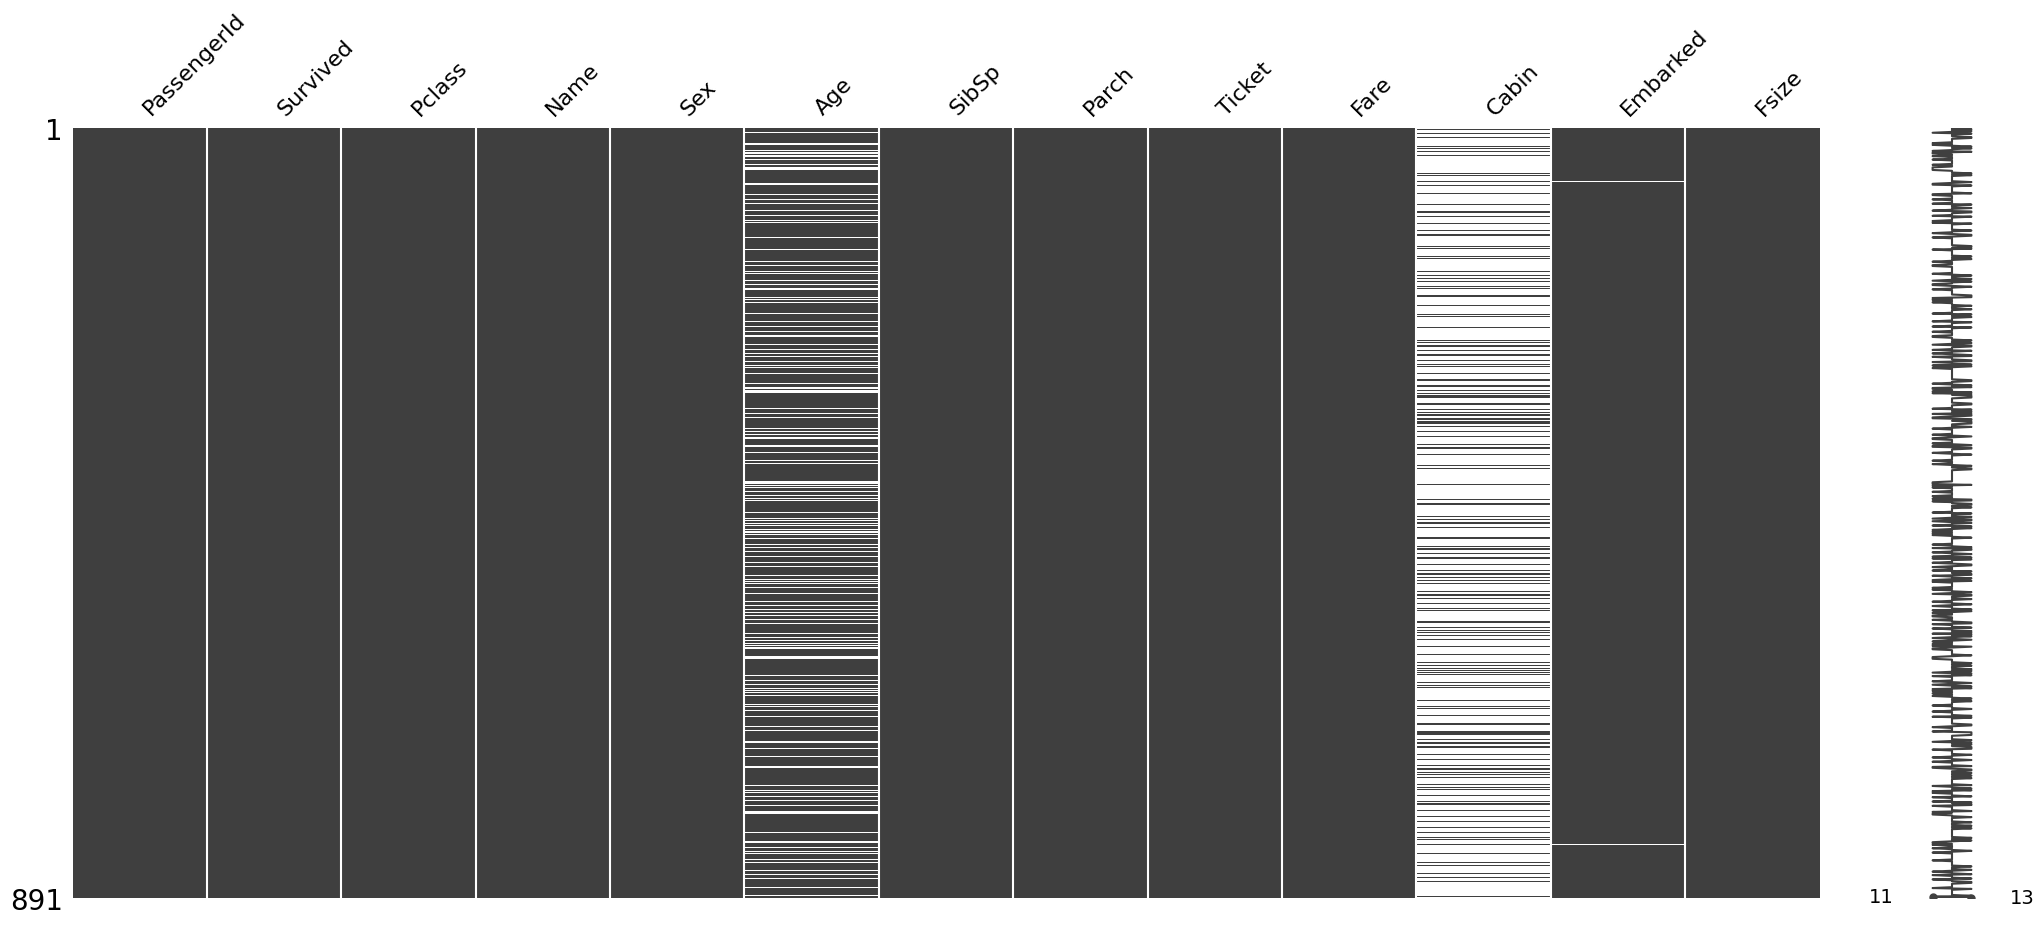

In [6]:
msno.matrix(train)

<Axes: xlabel='Embarked', ylabel='count'>

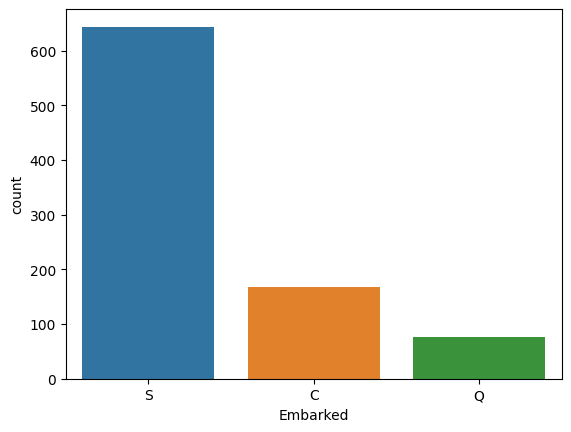

In [7]:
sns.countplot(x = 'Embarked', data = train)

In [8]:
train['Embarked'].fillna('S', inplace = True)

<Axes: >

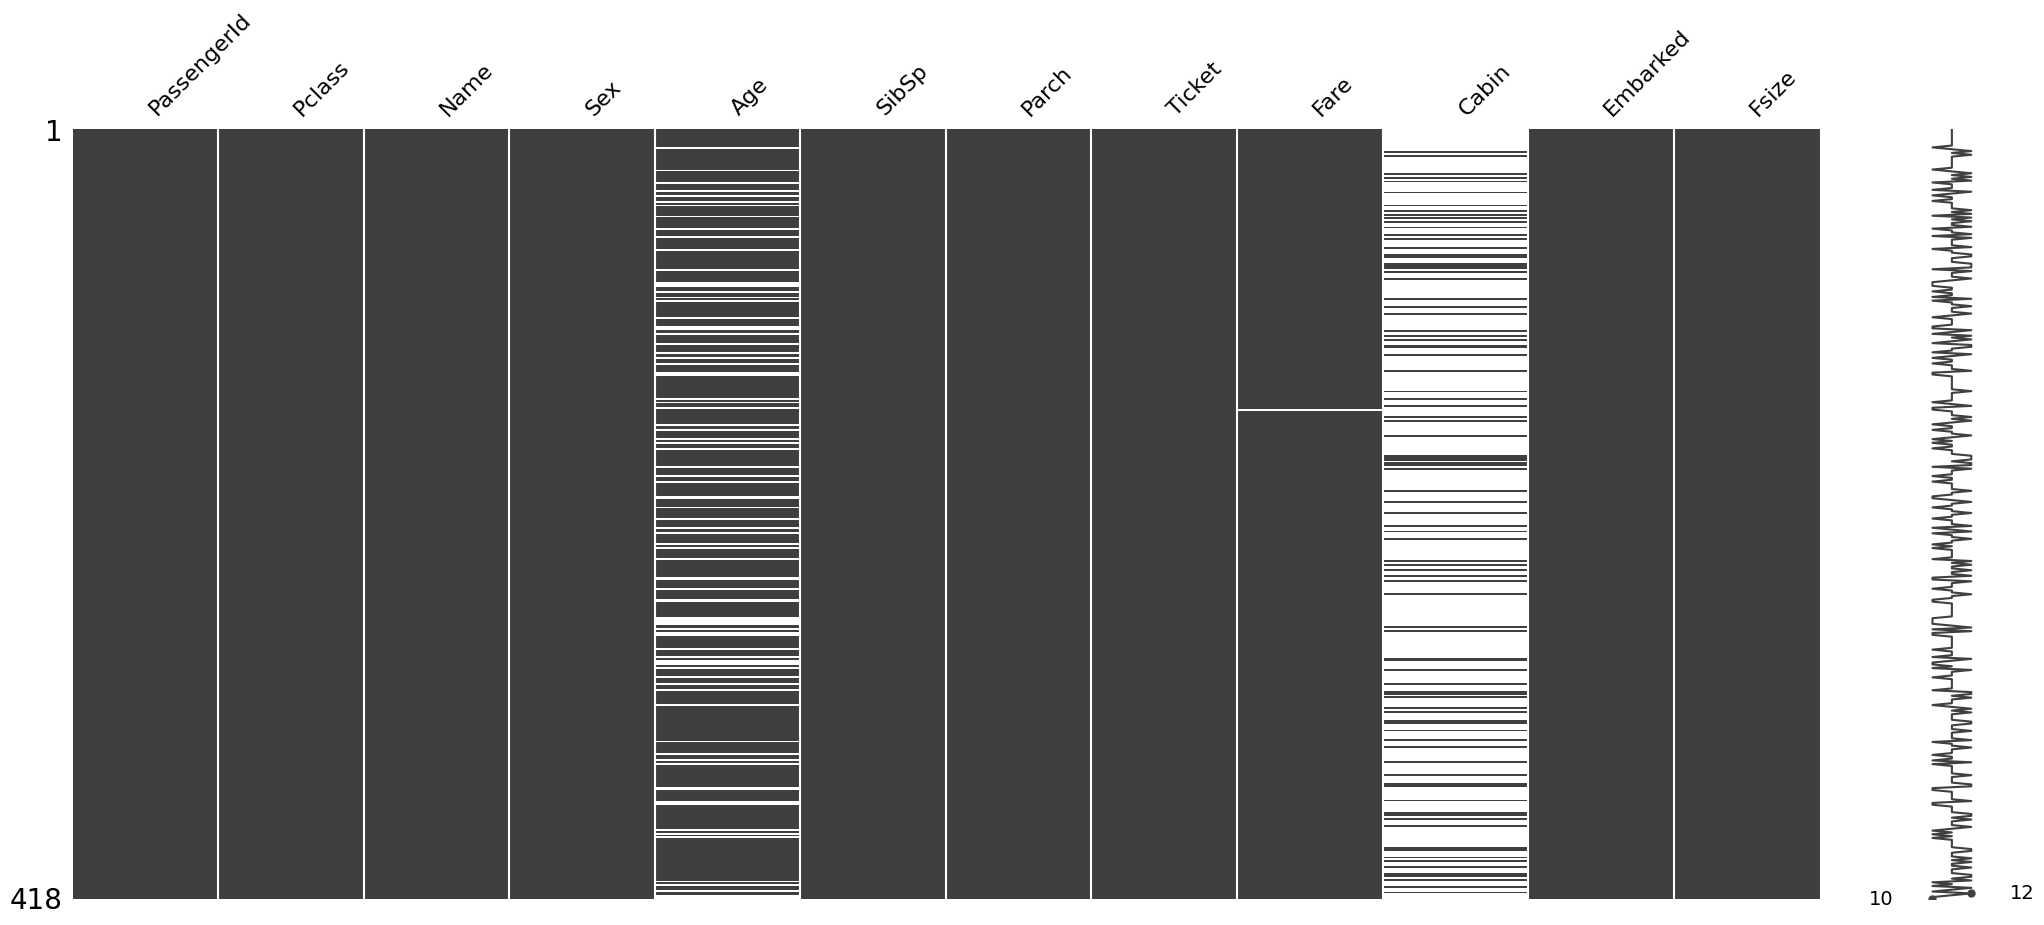

In [9]:
msno.matrix(test)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
y = train['Survived']

features = ['Pclass', 'Sex', 'Fsize']
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [12]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X, y)
prediction = model.predict(X_test)

In [13]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
